In [102]:
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

from pathlib import Path

In [123]:
mse_list = []
mae_list = []
corr_list = []
representation_name_list = []
for path in Path("/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/affinity_prediction/")\
.glob("Affinit_prediction_skempiv1_*_detail.csv"):
    #print(path)
    representation_name_list.append(str(path).split("skempiv1_")[1].split("_detail.csv")[0])
    mse_list.append(pd.read_csv(path)['val_mse_errors'])
    mae_list.append(pd.read_csv(path)['val_mae_errors'])
    corr_list.append(pd.read_csv(path)['validation_corr'])
    

df_mse = pd.concat(mse_list, axis=1)
df_mse.columns = representation_name_list
#Sorting columns by their mean value
df_mse = df_mse.reindex(df_mse.mean().sort_values(ascending=False).index, axis=1)

df_mae = pd.concat(mae_list, axis=1)
df_mae.columns = representation_name_list
#Sorting columns by their mean value
df_mae = df_mae.reindex(df_mae.mean().sort_values(ascending=False).index, axis=1)

df_corr = pd.concat(corr_list, axis=1)
df_corr.columns = representation_name_list
#Sorting columns by their mean value
df_corr = df_corr.reindex(df_corr.mean().sort_values().index, axis=1)

In [124]:
df_mse

,PFAM,AAC,APAAC,LEARNED-VEC,PROTVEC,K-SEP,UNIREP,CPC-PROT,XLNET,T5,BERT-BFD,BERT-PFAM,SEQVEC,ESMB1,ALBERT
0,2.108073,1.683668,1.756543,1.016695,0.945078,0.819674,0.660293,0.613292,0.575570,0.542026,0.444817,0.486842,0.485027,0.450163,0.363818
1,2.369755,1.948253,1.877006,1.161348,1.107979,1.074306,0.762166,0.738369,0.682961,0.537978,0.611387,0.609138,0.589129,0.493169,0.414565
2,2.273111,1.944204,1.756783,1.279863,1.184138,1.074676,0.686010,0.854581,0.569832,0.527603,0.926363,0.532121,0.538995,0.434206,0.422572
3,2.424406,1.930600,1.938557,1.227308,1.305883,1.072209,0.732935,0.808556,0.712379,0.587362,0.566967,0.557599,0.600896,0.621966,0.418076
4,2.281235,1.696047,1.714857,1.171091,1.094767,0.846457,0.683952,0.663005,0.587876,0.531136,0.486599,0.550132,0.511827,0.476562,0.376907
5,2.058992,1.648721,1.498729,1.047167,1.077726,0.989920,0.658096,0.621654,0.512663,0.504556,0.529628,0.522924,0.482960,0.488588,0.385243
6,2.254950,1.854286,1.738988,1.250117,1.134837,0.856228,0.712041,0.803881,0.695626,1.043043,0.671858,0.583105,0.587326,0.435311,0.533704
7,2.227672,1.839930,1.984052,1.253739,1.158530,1.137318,0.888054,0.826819,0.655713,0.518099,0.555272,0.639272,0.586660,0.549829,0.515289
8,2.342703,2.013785,1.810791,1.133077,1.154163,0.981106,0.761072,0.664550,0.520614,0.657308,0.463734,0.588213,0.498666,0.414722,0.316215
9,2.237945,1.918340,1.824198,1.307355,1.177525,0.853148,0.776349,0.704288,0.554477,0.585781,0.479161,0.591227,0.449098,0.463862,0.436316


In [125]:
df_corr.mean().sort_values()

PFAM           19.171632
AAC            46.047458
APAAC          47.724686
LEARNED-VEC    70.344999
PROTVEC        71.911108
K-SEP          76.126427
UNIREP         82.994914
CPC-PROT       83.091986
XLNET          86.153130
T5             86.659116
BERT-PFAM      87.143221
BERT-BFD       87.398103
SEQVEC         88.014843
ESMB1          89.150519
ALBERT         90.711130
dtype: float64

In [126]:
columnsTitles = ['K-SEP','APAAC','PFAM','AAC','PROTVEC','LEARNED-VEC','SEQVEC','CPC-PROT','BERT-BFD',\
    'BERT-PFAM','ESMB1','ALBERT','XLNET','UNIREP','T5']

In [127]:
df_mse.reindex(columns=columnsTitles)

,K-SEP,APAAC,PFAM,AAC,PROTVEC,LEARNED-VEC,SEQVEC,CPC-PROT,BERT-BFD,BERT-PFAM,ESMB1,ALBERT,XLNET,UNIREP,T5
0,0.819674,1.756543,2.108073,1.683668,0.945078,1.016695,0.485027,0.613292,0.444817,0.486842,0.450163,0.363818,0.575570,0.660293,0.542026
1,1.074306,1.877006,2.369755,1.948253,1.107979,1.161348,0.589129,0.738369,0.611387,0.609138,0.493169,0.414565,0.682961,0.762166,0.537978
2,1.074676,1.756783,2.273111,1.944204,1.184138,1.279863,0.538995,0.854581,0.926363,0.532121,0.434206,0.422572,0.569832,0.686010,0.527603
3,1.072209,1.938557,2.424406,1.930600,1.305883,1.227308,0.600896,0.808556,0.566967,0.557599,0.621966,0.418076,0.712379,0.732935,0.587362
4,0.846457,1.714857,2.281235,1.696047,1.094767,1.171091,0.511827,0.663005,0.486599,0.550132,0.476562,0.376907,0.587876,0.683952,0.531136
5,0.989920,1.498729,2.058992,1.648721,1.077726,1.047167,0.482960,0.621654,0.529628,0.522924,0.488588,0.385243,0.512663,0.658096,0.504556
6,0.856228,1.738988,2.254950,1.854286,1.134837,1.250117,0.587326,0.803881,0.671858,0.583105,0.435311,0.533704,0.695626,0.712041,1.043043
7,1.137318,1.984052,2.227672,1.839930,1.158530,1.253739,0.586660,0.826819,0.555272,0.639272,0.549829,0.515289,0.655713,0.888054,0.518099
8,0.981106,1.810791,2.342703,2.013785,1.154163,1.133077,0.498666,0.664550,0.463734,0.588213,0.414722,0.316215,0.520614,0.761072,0.657308
9,0.853148,1.824198,2.237945,1.918340,1.177525,1.307355,0.449098,0.704288,0.479161,0.591227,0.463862,0.436316,0.554477,0.776349,0.585781


In [128]:
path = "/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/affinity_table_protbench.csv"
pd.DataFrame(dict(MSE = df_mse.reindex(columns=columnsTitles).mean(), MAE = df_mae.reindex(columns=columnsTitles).mean(),Corr= df_corr.reindex(columns=columnsTitles).mean())).to_csv(path)

In [129]:
#Classic Representations: Yellow
#Learned Small Scale Models: Blue
#Learned Large Scale Models: Red
group_color_dict = {'K-SEP':'green','BERT-PFAM':'red', 'UNIREP':'red', 'T5':'red', 'BERT-BFD':'red',\
 'SEQVEC':'red', 'ALBERT':'red', 'PFAM':'green', 'ESMB1':'red', \
 'XLNET':'red', 'AAC':'green', 'APAAC':'green', 'PROTVEC':'blue', 'MUT2VEC':'blue',\
'LEARNED-VEC':'blue', 'CPC-PROT':'blue'}

def set_colors_and_marks_for_representation_groups(ax):
    for label in ax.get_yticklabels():
        label.set_color(group_color_dict[label.get_text()])
        #if label.get_text() == 'PFAM' or label.get_text() == 'BERT-PFAM' :
        #    signed_text = label.get_text() + "*"
        #    label.set_text(signed_text)
    ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')

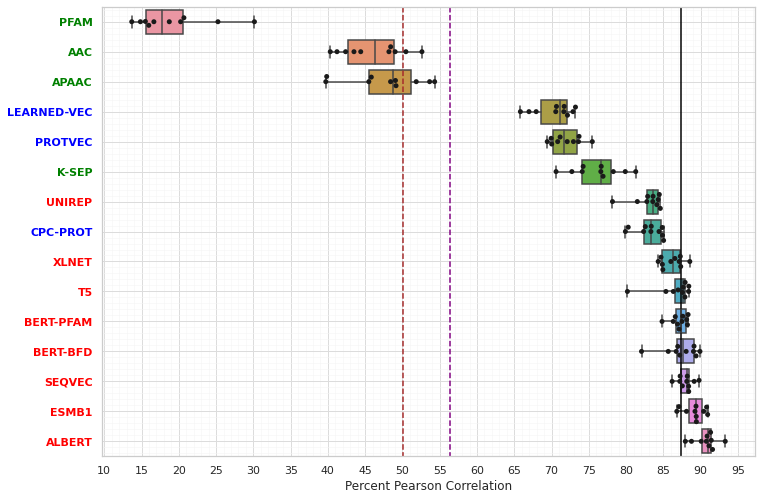

In [130]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid",color_codes=True)

ax = sns.boxplot(data=df_corr, whis=np.inf,  orient="h")
ax = sns.swarmplot(data=df_corr, orient="h",color=".1")
ax.set_xlabel("Percent Pearson Correlation")
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='gainsboro', linewidth=1.0)
ax.grid(b=True, which='minor', color='whitesmoke', linewidth=0.5)

best_pipr = 87.3 
baseline_ac = 56.4
baseline_ctd = 50.1

plt.plot((best_pipr,best_pipr),(-1,20),color='black')
plt.plot((baseline_ac,baseline_ac),(-1,20),color='purple',linestyle='dashed')
plt.plot((baseline_ctd,baseline_ctd),(-1,20),color='brown',linestyle='dashed')
set_colors_and_marks_for_representation_groups(ax)


ax.get_figure()\
.savefig('/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/figures/affinity_estimation_mae.png')
ax.get_figure()\
.savefig('/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/figures/affinity_estimation_mae.eps')

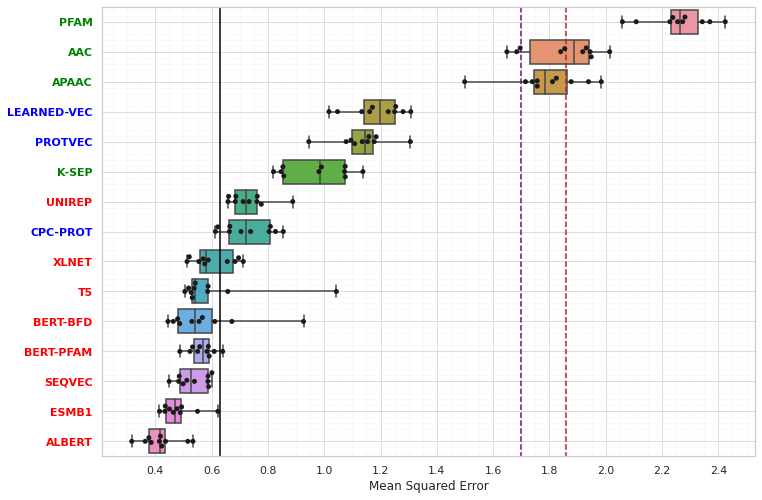

In [131]:
sns.set_theme(style="ticks", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid",color_codes=True)

ax = sns.boxplot(data=df_mse, whis=np.inf,  orient="h")
ax = sns.swarmplot(data=df_mse, orient="h",color=".1")
ax.set_xlabel("Mean Squared Error")

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='gainsboro', linewidth=1.0)
ax.grid(b=True, which='minor', color='whitesmoke', linewidth=0.5)

best_pipr = 0.63
baseline_ac = 1.70
baseline_ctd = 1.86

plt.plot((best_pipr,best_pipr),(-1,20),color='black')
plt.plot((baseline_ac,baseline_ac),(-1,20),color='purple',linestyle='dashed')
plt.plot((baseline_ctd,baseline_ctd),(-1,20),color='brown',linestyle='dashed')
set_colors_and_marks_for_representation_groups(ax)
ax.get_figure()\
.savefig('/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/figures/affinity_estimation_mse.png')
ax.get_figure()\
.savefig('/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/figures/affinity_estimation_mse.eps')

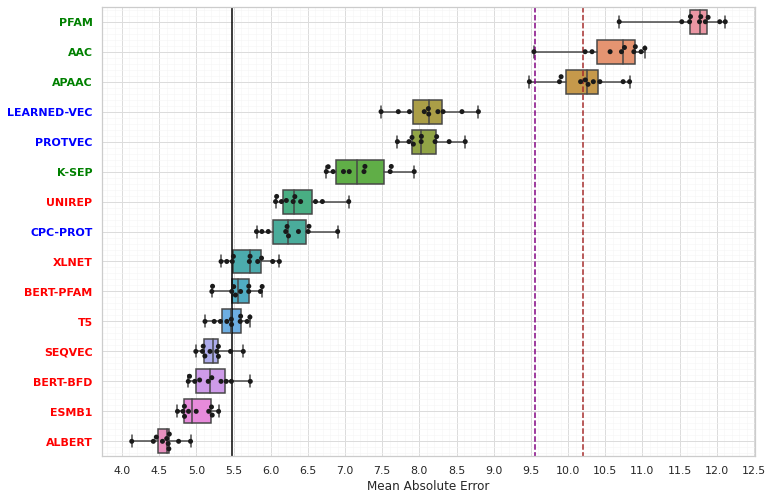

In [132]:
sns.set_theme(style="ticks", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid",color_codes=True)

ax = sns.boxplot(data=df_mae, whis=np.inf,  orient="h")
ax = sns.swarmplot(data=df_mae, orient="h",color=".1")
ax.set_xlabel("Mean Absolute Error")

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='gainsboro', linewidth=1.0)
ax.grid(b=True, which='minor', color='whitesmoke', linewidth=0.5)

best_pipr = 5.48
baseline_ac = 9.56
baseline_ctd = 10.20

plt.plot((best_pipr,best_pipr),(-1,20),color='black')
plt.plot((baseline_ac,baseline_ac),(-1,20),color='purple',linestyle='dashed')
plt.plot((baseline_ctd,baseline_ctd),(-1,20),color='brown',linestyle='dashed')
set_colors_and_marks_for_representation_groups(ax)
ax.get_figure()\
.savefig('/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/figures/affinity_estimation_mae.png')
ax.get_figure()\
.savefig('/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/figures/affinity_estimation_mae.eps')